# **FINAL PROJECT FOR THE MACHINE LEARNING COURSE**

## **Instruction**

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa, and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enable households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other finance services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

**The objective of this competition** is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

## **Program**

In [603]:
# Import the dependencies
import numpy as np
import pandas as pd
import scipy.linalg
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sb.set_style()
%matplotlib inline

In [604]:
# Load the training data
df = pd.read_csv("train.csv")

In [605]:
df.head()

,Unnamed: 0,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,year_,relationship_with_head_Child,relationship_with_head_Head of Household,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,0,1,0,1,3,24,0,2018,0,0,...,0,0,0,0,0,1,1,0,0,0
1,1,0,0,0,5,70,0,2018,0,1,...,1,0,0,0,0,0,1,0,0,0
2,2,1,1,1,5,26,1,2018,0,0,...,0,0,0,0,0,1,1,0,0,0
3,3,0,0,1,5,34,0,2018,0,1,...,0,0,0,0,0,0,1,0,0,0
4,4,0,1,0,8,26,1,2018,1,0,...,0,1,0,0,0,0,1,0,0,0


In [606]:
df.describe()

,Unnamed: 0,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,year_,relationship_with_head_Child,relationship_with_head_Head of Household,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
count,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,...,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000
mean,11761.500000,0.140792,0.390282,0.741966,3.797483,38.805220,0.410092,2016.975939,0.094754,0.545443,...,0.010500,0.237927,0.026654,0.045911,0.107422,0.273635,0.257949,0.371323,0.281415,0.089313
std,6790.938202,0.347815,0.487824,0.437562,2.227613,16.520569,0.491861,0.847371,0.292881,0.497941,...,0.101932,0.425823,0.161072,0.209296,0.309656,0.445834,0.437515,0.483169,0.449699,0.285201
min,0.000000,0.000000,0.000000,0.000000,1.000000,16.000000,0.000000,2016.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5880.750000,0.000000,0.000000,0.000000,2.000000,26.000000,0.000000,2016.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11761.500000,0.000000,0.000000,1.000000,3.000000,35.000000,0.000000,2017.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17642.250000,0.000000,1.000000,1.000000,5.000000,49.000000,1.000000,2018.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,23523.000000,1.000000,1.000000,1.000000,21.000000,100.000000,1.000000,2018.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [647]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 38 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   Unnamed: 0                                       10086 non-null  int64
 1   location_type                                    10086 non-null  int64
 2   cellphone_access                                 10086 non-null  int64
 3   household_size                                   10086 non-null  int64
 4   age_of_respondent                                10086 non-null  int64
 5   gender_of_respondent                             10086 non-null  int64
 6   year_                                            10086 non-null  int64
 7   relationship_with_head_Child                     10086 non-null  int64
 8   relationship_with_head_Head of Household         10086 non-null  int64
 9   relationship_with_head_Other non-relatives       1

In [608]:
# visualize the train data
df

,Unnamed: 0,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,year_,relationship_with_head_Child,relationship_with_head_Head of Household,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,0,1,0,1,3,24,0,2018,0,0,...,0,0,0,0,0,1,1,0,0,0
1,1,0,0,0,5,70,0,2018,0,1,...,1,0,0,0,0,0,1,0,0,0
2,2,1,1,1,5,26,1,2018,0,0,...,0,0,0,0,0,1,1,0,0,0
3,3,0,0,1,5,34,0,2018,0,1,...,0,0,0,0,0,0,1,0,0,0
4,4,0,1,0,8,26,1,2018,1,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,23519,0,0,1,4,48,0,2018,0,1,...,0,0,0,1,0,0,0,0,0,1
23520,23520,0,0,1,2,27,0,2018,0,1,...,0,0,0,1,0,0,0,0,0,1
23521,23521,0,0,1,5,27,0,2018,0,0,...,0,0,0,1,0,0,0,0,0,1
23522,23522,0,1,1,7,30,0,2018,0,0,...,0,0,0,0,0,1,0,0,0,1


In [609]:
cluster_data = df
cluster_data.dropna(axis=0, inplace=True)

In [610]:
cluster_data

,Unnamed: 0,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,year_,relationship_with_head_Child,relationship_with_head_Head of Household,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,0,1,0,1,3,24,0,2018,0,0,...,0,0,0,0,0,1,1,0,0,0
1,1,0,0,0,5,70,0,2018,0,1,...,1,0,0,0,0,0,1,0,0,0
2,2,1,1,1,5,26,1,2018,0,0,...,0,0,0,0,0,1,1,0,0,0
3,3,0,0,1,5,34,0,2018,0,1,...,0,0,0,0,0,0,1,0,0,0
4,4,0,1,0,8,26,1,2018,1,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,23519,0,0,1,4,48,0,2018,0,1,...,0,0,0,1,0,0,0,0,0,1
23520,23520,0,0,1,2,27,0,2018,0,1,...,0,0,0,1,0,0,0,0,0,1
23521,23521,0,0,1,5,27,0,2018,0,0,...,0,0,0,1,0,0,0,0,0,1
23522,23522,0,1,1,7,30,0,2018,0,0,...,0,0,0,0,0,1,0,0,0,1


In [611]:
cluster_array = np.array(cluster_data)
cluster_array

array([[    0,     1,     0, ...,     0,     0,     0],
       [    1,     0,     0, ...,     0,     0,     0],
       [    2,     1,     1, ...,     0,     0,     0],
       ...,
       [23521,     0,     0, ...,     0,     0,     1],
       [23522,     0,     1, ...,     0,     0,     1],
       [23523,     0,     0, ...,     0,     0,     1]])

In [612]:
def calc_distance(X1, X2):
    return(sum((X1 - X2)**2))**0.5

In [613]:
import random
random.sample(range(0, len(cluster_array)), 4)

[2828, 12053, 7031, 3619]

In [614]:
i_centroid = random.sample(range(0, len(cluster_array)), 4)

In [615]:
i_centroid

[5424, 14957, 20900, 20642]

In [616]:
initial_centroids = []
for i in i_centroid:
    initial_centroids.append(cluster_array[i])
initial_centroids

[array([5424,    0,    0,    1,    2,   50,    1, 2018,    0,    1,    0,
           0,    0,    0,    0,    0,    1,    0,    0,    0,    0,    1,
           0,    0,    0,    0,    0,    0,    1,    0,    0,    0,    0,
           0,    0,    1,    0,    0,    0]),
 array([14957,     0,     0,     1,     2,    29,     0,  2017,     0,
            0,     0,     0,     0,     1,     0,     0,     0,     1,
            0,     1,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     1,     0,     0,     0,     0,     0,
            0,     1,     0]),
 array([20900,     0,     1,     0,     2,    37,     1,  2017,     0,
            1,     0,     0,     0,     0,     0,     0,     0,     1,
            0,     0,     0,     0,     0,     1,     0,     0,     0,
            0,     0,     0,     1,     0,     0,     0,     0,     0,
            0,     1,     0]),
 array([20642,     0,     1,     1,     2,    16,     1,  2017,     0,
            0,     0,     0,   

In [617]:
ic = np.array(initial_centroids)

In [618]:
ic

array([[ 5424,     0,     0,     1,     2,    50,     1,  2018,     0,
            1,     0,     0,     0,     0,     0,     0,     1,     0,
            0,     0,     0,     1,     0,     0,     0,     0,     0,
            0,     1,     0,     0,     0,     0,     0,     0,     1,
            0,     0,     0],
       [14957,     0,     0,     1,     2,    29,     0,  2017,     0,
            0,     0,     0,     0,     1,     0,     0,     0,     1,
            0,     1,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     1,     0,     0,     0,     0,     0,
            0,     1,     0],
       [20900,     0,     1,     0,     2,    37,     1,  2017,     0,
            1,     0,     0,     0,     0,     0,     0,     0,     1,
            0,     0,     0,     0,     0,     1,     0,     0,     0,
            0,     0,     0,     1,     0,     0,     0,     0,     0,
            0,     1,     0],
       [20642,     0,     1,     1,     2,    16,     1,  

In [619]:
ic[:, 0]

array([ 5424, 14957, 20900, 20642])

In [620]:
def findClosestCentroids(ic, X):
    assigned_centroid = []
    for i in X:
        distance=[]
        for j in ic:
            distance.append(calc_distance(i, j))
        assigned_centroid.append(np.argmin(distance))
    return assigned_centroid

In [621]:
centroids = findClosestCentroids(initial_centroids, cluster_array)

In [622]:
centroids

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [623]:
def calc_centroids(clusters, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])],
                      axis=1)
    for c in set(new_df['cluster']):
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

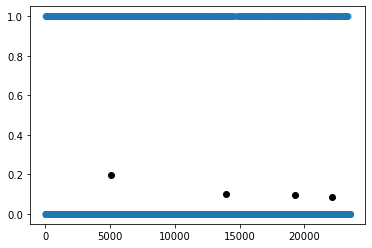

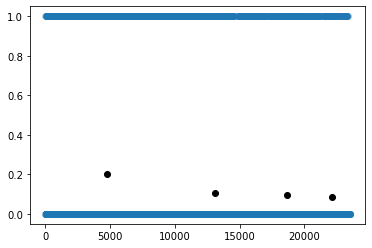

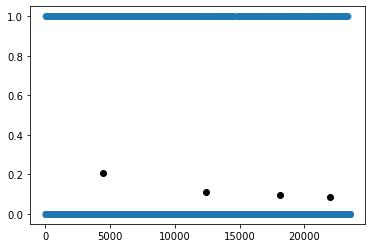

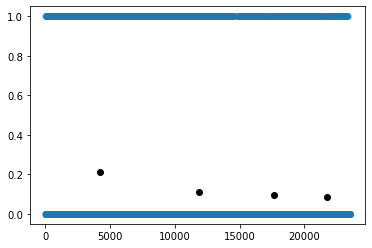

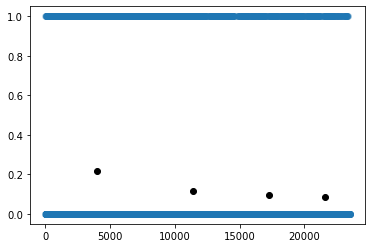

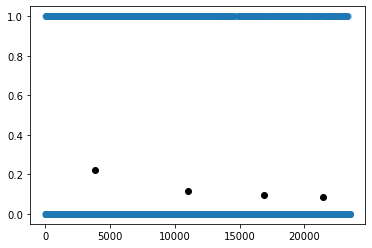

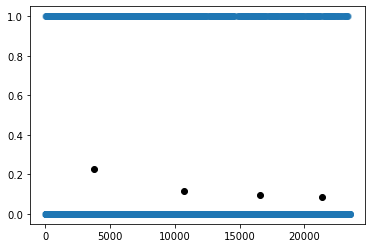

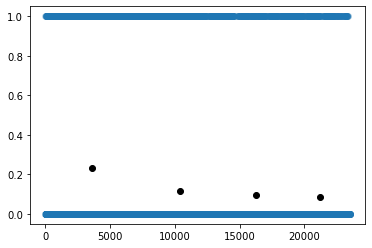

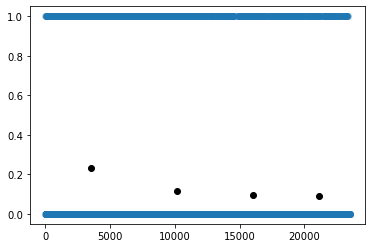

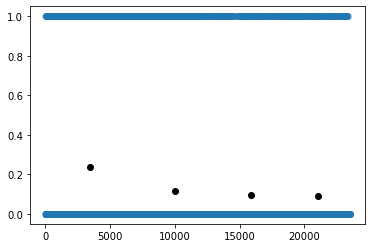

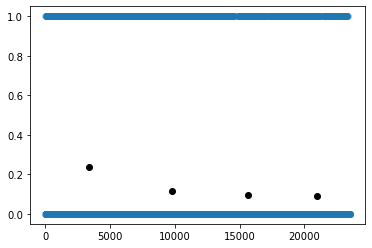

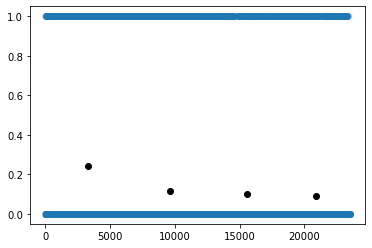

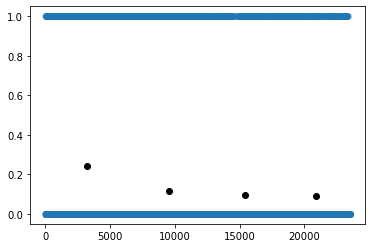

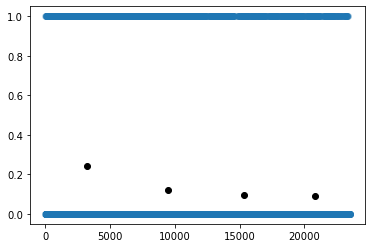

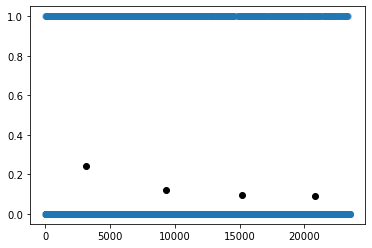

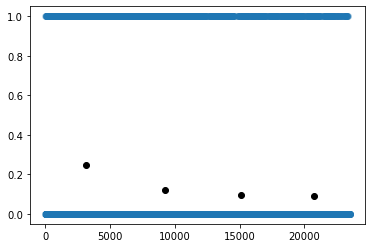

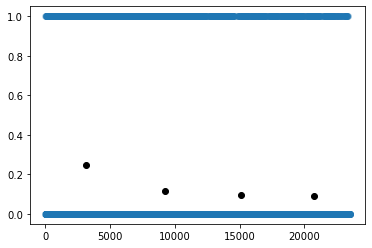

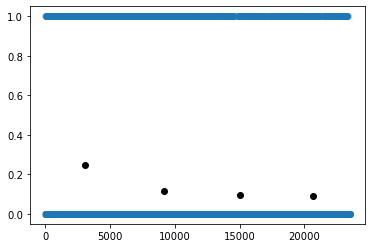

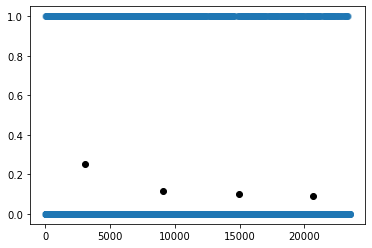

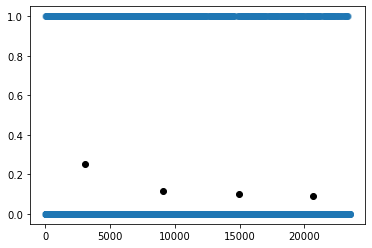

In [624]:
centroids = initial_centroids
for i in range(20):
    get_centroids = findClosestCentroids(centroids, cluster_array)
    centroids = calc_centroids(get_centroids, cluster_array)
    # print(centroids)
    plt.figure()
    plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='black')
    plt.scatter(cluster_array[:, 0], cluster_array[:, 1], alpha=0.1)
    plt.show()

## **Prediction Model**

## **Test dataset**

In [625]:
# df1 = pd.read_csv('test.csv')
df1 = pd.read_csv('test.csv')

In [626]:
df1.head()

,Unnamed: 0,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,year_,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,0,1,1,3,30,1,2018,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,1,1,1,7,51,1,2018,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,2,0,0,3,77,0,2018,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,3,0,0,6,39,0,2018,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,4,1,0,3,16,1,2018,1,0,0,...,0,0,0,0,1,0,1,0,0,0


In [642]:
plt.figure()
# plt.scatter(df1[0], df1[1])
plt.show()

<Figure size 432x288 with 0 Axes>

In [628]:
init_centroids = random.sample(range(0, len(df1)), 3)

In [629]:
init_centroids

[8399, 3482, 2675]

In [630]:
init_centroids = [95, 30, 17]

In [631]:
centroids = []
for i in init_centroids:
    centroids.append(df1.loc[i])
centroids

[Unnamed: 0                                           95
 location_type                                         0
 cellphone_access                                      1
 household_size                                        2
 age_of_respondent                                    18
 gender_of_respondent                                  1
 year_                                              2018
 relationship_with_head_Child                          1
 relationship_with_head_Head of Household              0
 relationship_with_head_Other non-relatives            0
 relationship_with_head_Other relative                 0
 relationship_with_head_Parent                         0
 relationship_with_head_Spouse                         0
 marital_status_Divorced/Seperated                     0
 marital_status_Dont know                              0
 marital_status_Married/Living together                0
 marital_status_Single/Never Married                   1
 marital_status_Widowed        

In [632]:
centroids = np.array(centroids)

In [633]:
X = np.array(df1)

In [634]:
X

array([[    0,     1,     1, ...,     0,     0,     0],
       [    1,     1,     1, ...,     0,     0,     0],
       [    2,     0,     0, ...,     0,     0,     0],
       ...,
       [10083,     1,     1, ...,     0,     0,     1],
       [10084,     0,     1, ...,     0,     0,     1],
       [10085,     1,     1, ...,     0,     0,     1]])

In [635]:
centroids

array([[  95,    0,    1,    2,   18,    1, 2018,    1,    0,    0,    0,
           0,    0,    0,    0,    0,    1,    0,    0,    0,    1,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,
           0,    1,    0,    0,    0],
       [  30,    1,    1,    3,   27,    0, 2018,    0,    1,    0,    0,
           0,    0,    0,    0,    0,    1,    0,    0,    0,    0,    1,
           0,    0,    0,    0,    0,    0,    0,    1,    0,    0,    0,
           0,    1,    0,    0,    0],
       [  17,    0,    0,    1,   68,    0, 2018,    0,    1,    0,    0,
           0,    0,    1,    0,    0,    0,    0,    0,    0,    1,    0,
           0,    0,    0,    1,    0,    0,    0,    0,    0,    0,    0,
           0,    1,    0,    0,    0]])

In [636]:
get_centroids = findClosestCentroids(centroids, X)

In [637]:
get_centroids

[1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


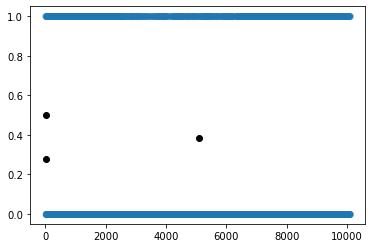

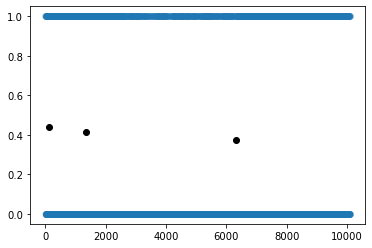

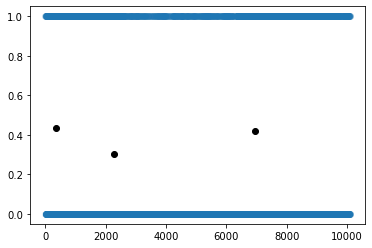

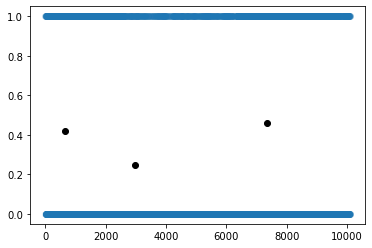

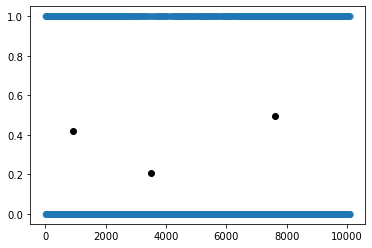

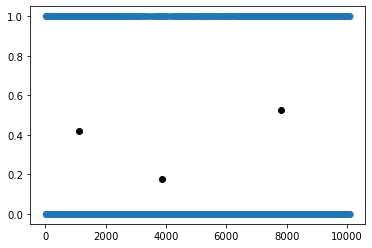

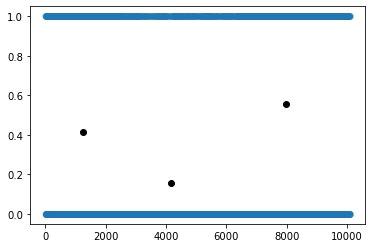

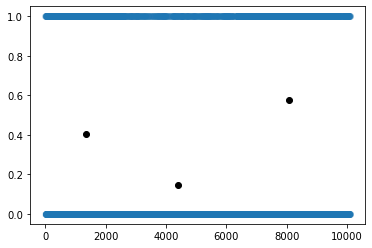

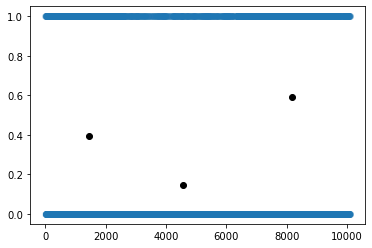

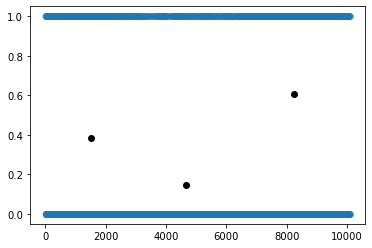

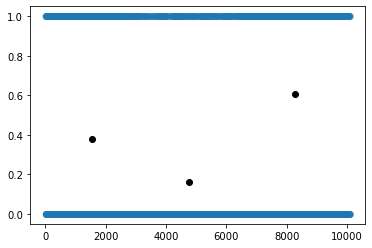

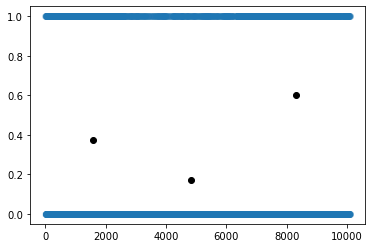

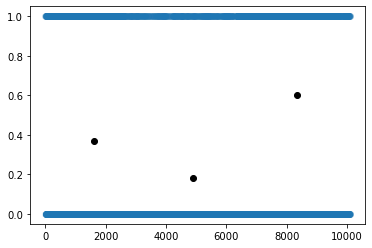

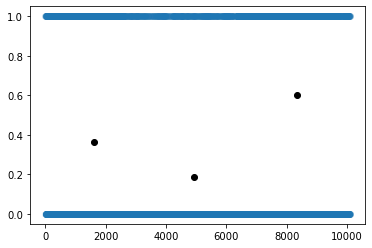

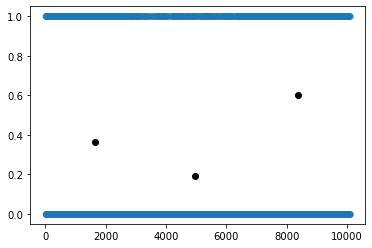

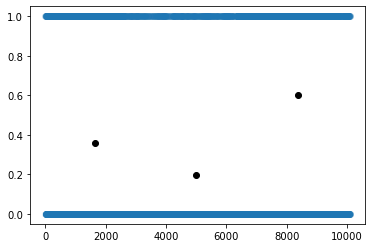

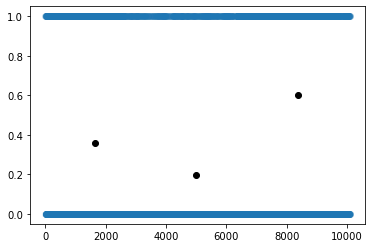

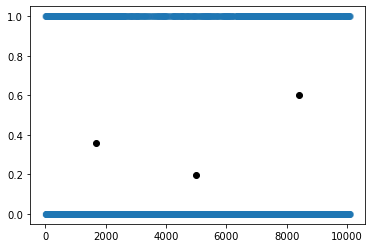

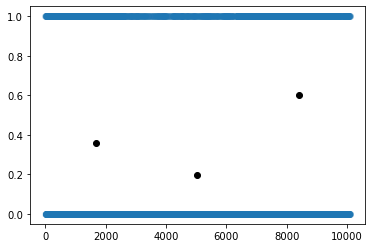

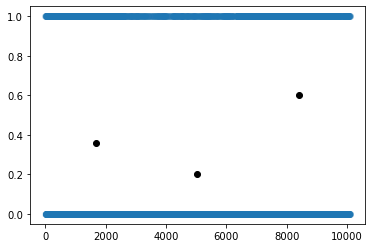

In [638]:
for i in range(20):
    get_centroids = findClosestCentroids(centroids, X)
    centroids = calc_centroids(get_centroids, X)
    #print(centroids)
    plt.figure()
    plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='black')
    plt.scatter(X[:, 0], X[:, 1], alpha=0.1)
    plt.show()